<a href="https://colab.research.google.com/github/kirath2205/Neural-Network-Assignment-1/blob/pramurta/Copy_of_start_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import pandas as pd
import time
import numpy as np
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Read Data

In [ ]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
df['label'].value_counts()

hiphop       100
reggae       100
disco        100
jazz         100
pop          100
metal        100
classical    100
blues        100
country      100
rock         100
Name: label, dtype: int64

#Question 1


In [ ]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset_question1(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [ ]:
X_train, y_train, X_test, y_test = prepare_dataset_question1(df, columns_to_drop, test_size=0.3, random_state=0)


In [ ]:
def build_model(total_classes,input_shape,dropout_probability=0.3,optimizer='adam'):

  model=tf.keras.models.Sequential()
  model.add(keras.layers.Input(shape=input_shape))
  model.add(keras.layers.Dense(16, activation="relu"))
  model.add(keras.layers.Dropout(dropout_probability))
  model.add(keras.layers.Dense(total_classes, activation='softmax'))
  model.compile(optimizer=optimizer,metrics=['accuracy'],loss=keras.losses.SparseCategoricalCrossentropy())

  return model

def train_model(model,epochs,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[]):
    
  history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test),callbacks=callbacks)
  return history


**Part A**

In [ ]:
history={}
model=build_model(10,X_train[0].shape)
history['question-1']=train_model(model,50,X_train,y_train,X_test,y_test)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.1943 - accuracy: 0.2414 - val_loss: 1.7366 - val_accuracy: 0.4200
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.6147 - accuracy: 0.4257 - val_loss: 1.4386 - val_accuracy: 0.4633
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4408 - accuracy: 0.4786 - val_loss: 1.3203 - val_accuracy: 0.5167
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2913 - accuracy: 0.5214 - val_loss: 1.2074 - val_accuracy: 0.5700
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2012 - accuracy: 0.5471 - val_loss: 1.1506 - val_accuracy: 0.5833
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2352 - accuracy: 0.5529 - val_loss: 1.1239 - val_accuracy: 0.5900
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1072 - accuracy: 0.5871 - val_loss: 1.1156 - val_accuracy: 0.5933
Epoch 

**Part B**

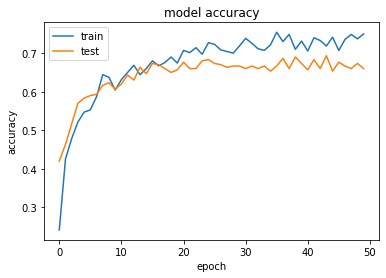

In [ ]:
plt.plot(history['question-1'].history['accuracy'])
plt.plot(history['question-1'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Part C**

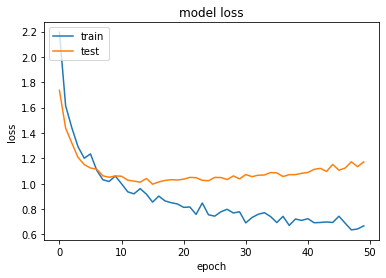

In [ ]:
plt.plot(history['question-1'].history['loss'])
plt.plot(history['question-1'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Question 2

**Part A**

In [ ]:

from sklearn.model_selection import KFold
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)



def prepare_dataset_question2(df, columns_to_drop):

    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])

    X = df.drop(columns_to_drop,axis=1)
    Y = df['label'].to_numpy()

    standard_scaler = preprocessing.StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    return X_scaled,Y


In [ ]:
X,y = prepare_dataset_question2(df, columns_to_drop)

In [ ]:
kf = KFold(n_splits=3)

batch_sizes = [1,4,8,16,32,64]
epoch_times = {}
history = {}


for batch_size in batch_sizes:
    epoch_times[batch_size] = []

k_fold = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for batch_size in batch_sizes:
        history[(k_fold,batch_size)] = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=batch_size)
    k_fold+=1

Epoch 1/50
666/666 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8003 - val_loss: 13.0516 - val_accuracy: 0.0359
Epoch 2/50
666/666 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.8108 - val_loss: 14.1140 - val_accuracy: 0.0299
Epoch 3/50
666/666 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.8048 - val_loss: 14.3156 - val_accuracy: 0.0240
Epoch 4/50
666/666 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.7868 - val_loss: 15.0658 - val_accuracy: 0.0240
Epoch 5/50
666/666 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8348 - val_loss: 15.3669 - val_accuracy: 0.0150
Epoch 6/50
666/666 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.8138 - val_loss: 16.5148 - val_accuracy: 0.0210
Epoch 7/50
666/666 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.8213 - val_loss: 16.8463 - val_accuracy: 0.0240

In [ ]:
history

{(1, 1): <keras.callbacks.History at 0x7f53125040d0>,
 (1, 4): <keras.callbacks.History at 0x7f5317735890>,
 (1, 8): <keras.callbacks.History at 0x7f53176d6b10>,
 (1, 16): <keras.callbacks.History at 0x7f5312737a10>,
 (1, 32): <keras.callbacks.History at 0x7f5317782190>,
 (1, 64): <keras.callbacks.History at 0x7f53176b9890>,
 (2, 1): <keras.callbacks.History at 0x7f5317610c90>,
 (2, 4): <keras.callbacks.History at 0x7f5317782dd0>,
 (2, 8): <keras.callbacks.History at 0x7f5317705cd0>,
 (2, 16): <keras.callbacks.History at 0x7f531769c610>,
 (2, 32): <keras.callbacks.History at 0x7f53175fa090>,
 (2, 64): <keras.callbacks.History at 0x7f531266f090>,
 (3, 1): <keras.callbacks.History at 0x7f5312504850>,
 (3, 4): <keras.callbacks.History at 0x7f531263ae50>,
 (3, 8): <keras.callbacks.History at 0x7f5317556990>,
 (3, 16): <keras.callbacks.History at 0x7f53177ae890>,
 (3, 32): <keras.callbacks.History at 0x7f5319015e10>,
 (3, 64): <keras.callbacks.History at 0x7f531759ee10>}

In [ ]:
mean_cross_val_accuracy = {}
num_epochs = 50
for batch_size in batch_sizes:
    mean_cross_val_accuracy[batch_size] = []


for batch_size in batch_sizes:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=history[(kFold,batch_size)].history['val_accuracy'][epoch]
        mean_cross_val_accuracy[batch_size].append(sum_for_3_folds/3)


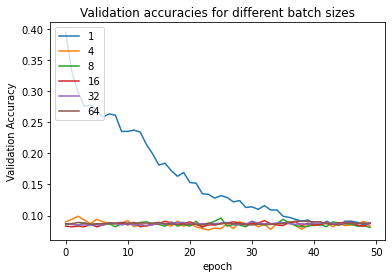

In [ ]:
for batch_size in batch_sizes:
    plt.plot(mean_cross_val_accuracy[batch_size])

plt.title('Validation accuracies for different batch sizes')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['1', '4', '8', '16', '32', '64'], loc='upper left')

plt.show()

**Part B**

In [ ]:
kf = KFold(n_splits=3)

batch_sizes = [1,4,8,16,32,64]
epoch_times = {}
history = {}


for batch_size in batch_sizes:
    epoch_times[batch_size] = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for batch_size in batch_sizes:
        time_callback = TimeHistory()
        history = train_model(model,1,X_train,y_train,X_test,y_test,batch_size=batch_size,callbacks=[time_callback])
        for callback_time in time_callback.times:
            epoch_times[batch_size].append(callback_time)

11/11 [==============================] - 0s 8ms/step - loss: 0.4945 - accuracy: 0.8171 - val_loss: 1.3362 - val_accuracy: 0.4144


In [ ]:
import statistics
median_times_by_batch_size = []
for batch_size in epoch_times.keys():
    median_times_by_batch_size.append([batch_size, statistics.median(epoch_times[batch_size])])

median_epoch_time_table=pd.DataFrame(median_times_by_batch_size,columns=['Batch_size','Median_time'])

median_epoch_time_table.head()

,Batch_size,Median_time
0,1,1.262258
1,4,0.493704
2,8,0.266738
3,16,0.180164
4,32,0.108858


[0.8170914649963379]